In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
dataframe_2=pd.read_excel("BeAnel.xlsx",index_col=1)
dataframe_2=dataframe_2.drop(["SRNO"],axis=1)

dataframe_2.head()

,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade,quizzes be,mid term be,end term be,total(100) be,grades be
ROLLNO,,,,,,,,,,,
14UCC040,VAIBHAV VYAS,15.75,19,15.0,49.75,BC,0.00,0.0,0.0,0.00,F
17DEC001,AASTHA SINGH,12.50,18,13.0,43.50,C,23.75,5.5,14.0,40.45,CD
17DEC002,KAPIL SINGH,8.00,7,11.0,26.00,D,12.80,1.5,3.0,16.70,F
17DEC004,RAJ VAIBHAV DUBEY,13.50,10,12.0,35.50,CD,14.21,11.0,20.0,41.21,C
17DEC005,SHIVAM BEEYANI,12.25,7,8.0,27.25,D,13.92,11.0,17.0,38.52,CD


In [3]:
dataframe_2[dataframe_2.index.duplicated()]

,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade,quizzes be,mid term be,end term be,total(100) be,grades be
ROLLNO,,,,,,,,,,,


In [4]:
dataframe_2.tail()

,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade,quizzes be,mid term be,end term be,total(100) be,grades be
ROLLNO,,,,,,,,,,,
17UEC142,MS YUKTI MITTAL,16.25,22,19.0,57.25,B,18.00,17.0,24.0,54.20,BC
17UEC143,ADITYA RAJ,20.50,25,20.0,65.50,AB,27.08,8.0,37.5,65.08,AB
17UEC144,HARSHIT CHITTORA,18.50,13,19.0,50.50,BC,26.67,12.0,27.5,60.67,B
17UEC145,MEHUL MEHTA,15.25,17,22.0,54.25,B,23.75,21.5,30.5,69.65,A
17UEC146,YASH MAHESHWARI,21.75,22,18.0,61.75,AB,25.00,17.0,33.5,68.80,B


In [5]:
dataframe_2.isnull().sum()
#here we check for the null values in the dataframe

STUDENT NAME     0
Quizzes          0
mid Term         0
end Term         1
total(100)       0
grade            0
quizzes be       0
mid term be      0
end term be      0
total(100) be    0
grades be        0
dtype: int64

In [6]:
final_df=dataframe_2.copy()

In [7]:
final_df['end Term'].isnull().values.any()

True

In [8]:
print(final_df[final_df.isnull().any(axis=1)].head())

          STUDENT NAME  Quizzes  mid Term  end Term  total(100) grade  \
ROLLNO                                                                  
17UEC127  SUMEDHA RANA    10.75         6       NaN       16.75     I   

          quizzes be  mid term be  end term be   total(100) be grades be  
ROLLNO                                                                    
17UEC127       21.13         15.0          18.0          50.53        BC  


In [9]:
final_df.loc["17UEC127",'end Term']=0

In [10]:
final_df.isnull().sum()

STUDENT NAME     0
Quizzes          0
mid Term         0
end Term         0
total(100)       0
grade            0
quizzes be       0
mid term be      0
end term be      0
total(100) be    0
grades be        0
dtype: int64

In [11]:
a=[]
for lab,rows in final_df.iterrows():
    a.append(lab[2:5])
final_df['Branch']=a

In [12]:
final_df.head()

,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade,quizzes be,mid term be,end term be,total(100) be,grades be,Branch
ROLLNO,,,,,,,,,,,,
14UCC040,VAIBHAV VYAS,15.75,19,15.0,49.75,BC,0.00,0.0,0.0,0.00,F,UCC
17DEC001,AASTHA SINGH,12.50,18,13.0,43.50,C,23.75,5.5,14.0,40.45,CD,DEC
17DEC002,KAPIL SINGH,8.00,7,11.0,26.00,D,12.80,1.5,3.0,16.70,F,DEC
17DEC004,RAJ VAIBHAV DUBEY,13.50,10,12.0,35.50,CD,14.21,11.0,20.0,41.21,C,DEC
17DEC005,SHIVAM BEEYANI,12.25,7,8.0,27.25,D,13.92,11.0,17.0,38.52,CD,DEC


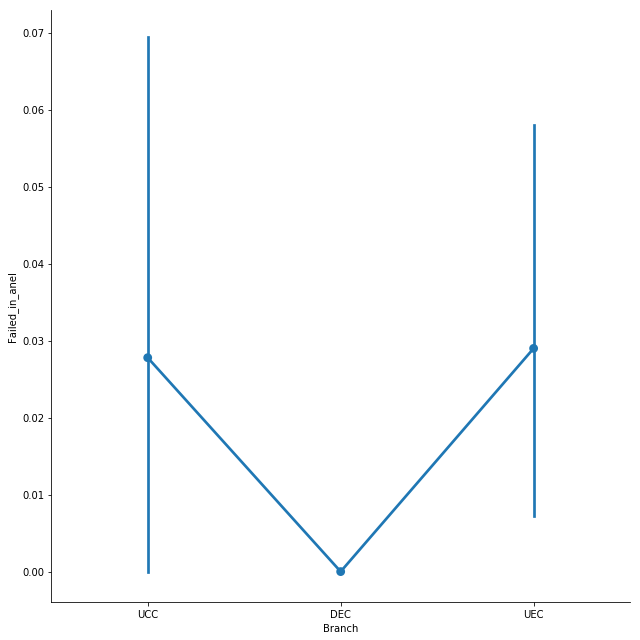

In [13]:
final_df['Failed_in_anel']=np.where(final_df['grade']=='F',1,0)
ax=sns.factorplot('Branch','Failed_in_anel',data=final_df,size=9)
plt.show()

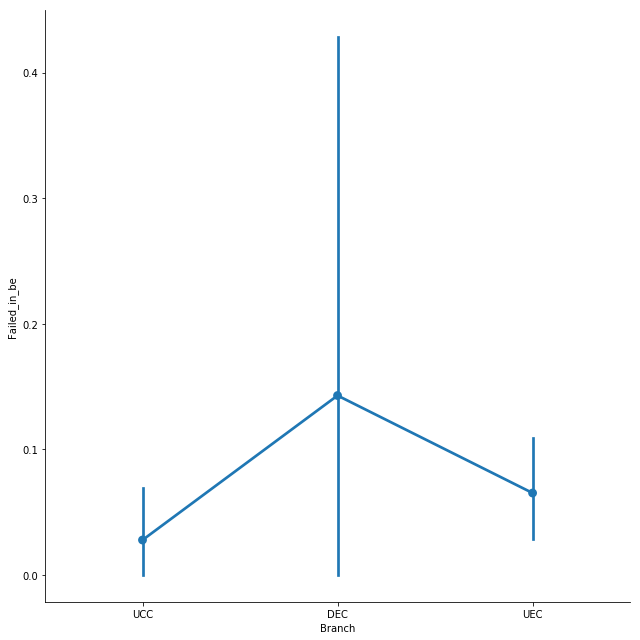

In [14]:
final_df['Failed_in_be']=np.where(final_df['grades be']=='F',1,0)
ax=sns.factorplot('Branch','Failed_in_be',data=final_df,size=9)
plt.show()

In [15]:
pd.crosstab(final_df['Failed_in_anel'],final_df['Branch'])

Branch,DEC,UCC,UEC
Failed_in_anel,,,
0,7,70,134
1,0,2,4


In [16]:
pd.crosstab(final_df['Failed_in_be'],final_df['Branch'])

Branch,DEC,UCC,UEC
Failed_in_be,,,
0,6,70,129
1,1,2,9


In [17]:
final_df.groupby('Branch').mean()

,Quizzes,mid Term,end Term,total(100),quizzes be,mid term be,end term be,total(100) be,Failed_in_anel,Failed_in_be
Branch,,,,,,,,,,
DEC,12.642857,11.142857,12.428571,36.214286,16.581429,8.357143,17.642857,39.052857,0.000000,0.142857
UCC,13.621528,14.680556,16.638889,44.940972,20.157917,11.493056,22.076389,49.312083,0.027778,0.027778
UEC,15.610507,16.528986,16.268116,48.407609,20.093406,11.039855,20.101449,47.214420,0.028986,0.065217


In [18]:
#the data shows about the averages of the different brach students in different areas
#we can also do
final_df.groupby('Branch').median()

,Quizzes,mid Term,end Term,total(100),quizzes be,mid term be,end term be,total(100) be,Failed_in_anel,Failed_in_be
Branch,,,,,,,,,,
DEC,12.50,10.0,12.0,29.75,15.630,11.0,17.0,40.450,0,0
UCC,13.25,14.5,16.0,44.75,20.630,12.0,22.5,48.745,0,0
UEC,15.25,17.0,16.5,49.00,20.755,11.0,20.0,47.740,0,0


In [19]:
final_df.head()

,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade,quizzes be,mid term be,end term be,total(100) be,grades be,Branch,Failed_in_anel,Failed_in_be
ROLLNO,,,,,,,,,,,,,,
14UCC040,VAIBHAV VYAS,15.75,19,15.0,49.75,BC,0.00,0.0,0.0,0.00,F,UCC,0,1
17DEC001,AASTHA SINGH,12.50,18,13.0,43.50,C,23.75,5.5,14.0,40.45,CD,DEC,0,0
17DEC002,KAPIL SINGH,8.00,7,11.0,26.00,D,12.80,1.5,3.0,16.70,F,DEC,0,1
17DEC004,RAJ VAIBHAV DUBEY,13.50,10,12.0,35.50,CD,14.21,11.0,20.0,41.21,C,DEC,0,0
17DEC005,SHIVAM BEEYANI,12.25,7,8.0,27.25,D,13.92,11.0,17.0,38.52,CD,DEC,0,0


In [20]:
final_df.describe()

,Quizzes,mid Term,end Term,total(100),quizzes be,mid term be,end term be,total(100) be,Failed_in_anel,Failed_in_be
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000
mean,14.854839,15.741935,16.267281,46.864055,20.001521,11.103687,20.677419,47.647143,0.027650,0.055300
std,4.778328,6.667204,6.853121,15.031351,5.157499,4.737028,8.080160,13.055755,0.164346,0.229092
min,1.750000,0.000000,0.000000,5.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.750000,10.000000,12.000000,36.000000,15.960000,8.000000,15.000000,38.530000,0.000000,0.000000
50%,14.500000,16.000000,16.000000,47.250000,20.630000,11.000000,21.500000,47.880000,0.000000,0.000000
75%,17.750000,21.000000,20.000000,58.250000,23.750000,14.000000,26.000000,56.550000,0.000000,0.000000
max,28.750000,29.000000,43.000000,86.750000,30.000000,21.500000,37.500000,74.350000,1.000000,1.000000


In [21]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 14UCC040 to 17UEC146
Data columns (total 14 columns):
STUDENT NAME      217 non-null object
Quizzes           217 non-null float64
mid Term          217 non-null int64
end Term          217 non-null float64
total(100)        217 non-null float64
grade             217 non-null object
quizzes be        217 non-null float64
mid term be       217 non-null float64
end term be       217 non-null float64
total(100) be     217 non-null float64
grades be         217 non-null object
Branch            217 non-null object
Failed_in_anel    217 non-null int32
Failed_in_be      217 non-null int32
dtypes: float64(7), int32(2), int64(1), object(4)
memory usage: 33.7+ KB


In [22]:
def conv(a):
    listf=[]
    if(a=="F"):
        return(0)
    elif(a=="D"):
        return(1)
    elif(a=="CD"):
        return(2)
    elif(a=="C"):
        return(3)
    elif(a=="BC"):
        return(4)
    elif(a=="B"):
        return(5)
    elif(a=="AB"):
        return(6)
    else:
        return(7)
final_df['anel_grade_cov']=[conv(a) for a in final_df['grade']]

In [23]:
def conv(a):
    listf=[]
    if(a=="F"):
        return(0)
    elif(a=="D"):
        return(1)
    elif(a=="CD"):
        return(2)
    elif(a=="C"):
        return(3)
    elif(a=="BC"):
        return(4)
    elif(a=="B"):
        return(5)
    elif(a=="AB"):
        return(6)
    else:
        return(7)
final_df['be_grade_cov']=[conv(a) for a in final_df['grades be']]

In [24]:
final_df.head()

,STUDENT NAME,Quizzes,mid Term,end Term,total(100),grade,quizzes be,mid term be,end term be,total(100) be,grades be,Branch,Failed_in_anel,Failed_in_be,anel_grade_cov,be_grade_cov
ROLLNO,,,,,,,,,,,,,,,,
14UCC040,VAIBHAV VYAS,15.75,19,15.0,49.75,BC,0.00,0.0,0.0,0.00,F,UCC,0,1,4,0
17DEC001,AASTHA SINGH,12.50,18,13.0,43.50,C,23.75,5.5,14.0,40.45,CD,DEC,0,0,3,2
17DEC002,KAPIL SINGH,8.00,7,11.0,26.00,D,12.80,1.5,3.0,16.70,F,DEC,0,1,1,0
17DEC004,RAJ VAIBHAV DUBEY,13.50,10,12.0,35.50,CD,14.21,11.0,20.0,41.21,C,DEC,0,0,2,3
17DEC005,SHIVAM BEEYANI,12.25,7,8.0,27.25,D,13.92,11.0,17.0,38.52,CD,DEC,0,0,1,2


In [25]:
print(final_df.columns.values)

[u'STUDENT NAME' u'Quizzes' u'mid Term' u'end Term' u'total(100)' u'grade'
 u'quizzes be' u'mid term be' u'end term be ' u'total(100) be'
 u'grades be' 'Branch' 'Failed_in_anel' 'Failed_in_be' 'anel_grade_cov'
 'be_grade_cov']


In [26]:
def convB(a):
    if(a=="UCC"):
        return(2)
    elif(a=="UEC"):
        return(1)
    else:
        return(0)
final_df['Branch_cov']=[convB(a) for a in final_df['Branch']]

In [27]:
Pred_df=final_df[["mid Term","end Term","Quizzes","Branch_cov","total(100)","anel_grade_cov","quizzes be","mid term be","total(100) be","be_grade_cov"]]

In [28]:
Pred_df.head()

,mid Term,end Term,Quizzes,Branch_cov,total(100),anel_grade_cov,quizzes be,mid term be,total(100) be,be_grade_cov
ROLLNO,,,,,,,,,,
14UCC040,19,15.0,15.75,2,49.75,4,0.00,0.0,0.00,0
17DEC001,18,13.0,12.50,0,43.50,3,23.75,5.5,40.45,2
17DEC002,7,11.0,8.00,0,26.00,1,12.80,1.5,16.70,0
17DEC004,10,12.0,13.50,0,35.50,2,14.21,11.0,41.21,3
17DEC005,7,8.0,12.25,0,27.25,1,13.92,11.0,38.52,2


In [29]:
from sklearn.model_selection import StratifiedShuffleSplit

In [30]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Pred_df, test_size=0.2, random_state=42)

In [31]:
train_set.head()

,mid Term,end Term,Quizzes,Branch_cov,total(100),anel_grade_cov,quizzes be,mid term be,total(100) be,be_grade_cov
ROLLNO,,,,,,,,,,
17UEC006,6,7.0,15.75,1,28.75,1,9.38,9.0,30.38,1
17UEC018,24,18.0,18.25,1,60.25,6,24.38,12.5,49.68,4
17UEC062,21,18.0,19.25,1,58.25,5,24.00,20.5,58.90,5
17UEC142,22,19.0,16.25,1,57.25,5,18.00,17.0,54.20,4
17UEC008,5,16.0,12.50,1,33.50,2,10.17,15.0,31.97,1


In [32]:
corr_matrix = Pred_df.corr()
corr_matrix["anel_grade_cov"].sort_values(ascending=False)

anel_grade_cov    1.000000
total(100)        0.947159
mid Term          0.855721
end Term          0.779123
Quizzes           0.668096
total(100) be     0.656778
be_grade_cov      0.650009
mid term be       0.493874
quizzes be        0.488384
Branch_cov       -0.027142
Name: anel_grade_cov, dtype: float64

In [33]:
Train_X=train_set.drop(["end Term","anel_grade_cov","total(100)","total(100) be"],axis=1)
Train_X.head()

,mid Term,Quizzes,Branch_cov,quizzes be,mid term be,be_grade_cov
ROLLNO,,,,,,
17UEC006,6,15.75,1,9.38,9.0,1
17UEC018,24,18.25,1,24.38,12.5,4
17UEC062,21,19.25,1,24.00,20.5,5
17UEC142,22,16.25,1,18.00,17.0,4
17UEC008,5,12.50,1,10.17,15.0,1


In [34]:
Train_Y_Mark = train_set["end Term"].copy()

In [35]:
Train_Y_FMark = train_set["total(100)"].copy()

In [36]:
Train_Y = train_set["anel_grade_cov"].copy()

In [37]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [38]:
lin_reg.fit(Train_X,Train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",lin_reg.predict(some_data))

('Predictions:\t', array([5.59533482, 2.01375089, 6.82504882, 2.53992027, 3.2458693 ,
       5.60723482, 2.33536227, 3.37440666]))


In [40]:
print("Labels\t\t",list(some_labels))

('Labels\t\t', [6L, 2L, 7L, 3L, 3L, 5L, 2L, 3L])


In [41]:
Train_Y.head()

ROLLNO
17UEC006    1
17UEC018    6
17UEC062    5
17UEC142    5
17UEC008    2
Name: anel_grade_cov, dtype: int64

In [42]:
Train_X.head()

,mid Term,Quizzes,Branch_cov,quizzes be,mid term be,be_grade_cov
ROLLNO,,,,,,
17UEC006,6,15.75,1,9.38,9.0,1
17UEC018,24,18.25,1,24.38,12.5,4
17UEC062,21,19.25,1,24.00,20.5,5
17UEC142,22,16.25,1,18.00,17.0,4
17UEC008,5,12.50,1,10.17,15.0,1


In [43]:
Test_X=test_set.drop(["end Term","anel_grade_cov","total(100)","total(100) be"],axis=1)
Test_Y=test_set["anel_grade_cov"].copy()

from sklearn.metrics import mean_squared_error
Grade_predictions = lin_reg.predict(Test_X)
lin_mse = mean_squared_error(Test_Y, Grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6952442785495947

In [44]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(Train_X,Train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [45]:
Grade_predictions = tree_reg.predict(Test_X)
tree_mse = mean_squared_error(Test_Y, Grade_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.2060453783110545

In [46]:
#error is more than our previous model may be this is because overfitting
#we can use cross validation to avoid overfitting
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, Train_X, Train_Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

1.3194585468064097

In [47]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(Train_X,Train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
scores = cross_val_score(forest_reg, Train_X, Train_Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

0.9532416949264787

In [49]:
#error is more than the linear regression
#it is time to try a new model of svm regressor
from sklearn.svm import SVR
svm_reg=SVR(C=1.0,epsilon=0.2)
svm_reg.fit(Train_X,Train_Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [50]:
scores = cross_val_score(svm_reg, Train_X, Train_Y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores.mean()

1.6494985859961369

In [51]:
#it also has more error than svm calssifier than do the final test on the test set
Grade_predictions = svm_reg.predict(Test_X)
svm_mse = mean_squared_error(Test_Y, Grade_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

1.8426683591750008

In [52]:
Grade_predictions = forest_reg.predict(Test_X)
forest_mse = mean_squared_error(Test_Y, Grade_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.8641864276984346

In [53]:
from sklearn import linear_model
clf = linear_model.SGDRegressor()

In [54]:
clf.fit(Train_X, Train_Y)

C:\Users\Harsh\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [55]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",clf.predict(some_data))

('Predictions:\t', array([8.41349286e+11, 3.92144425e+11, 1.03916305e+12, 4.39470390e+11,
       6.63452991e+11, 8.39938857e+11, 5.35754600e+11, 6.56974065e+11]))


In [56]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)

In [57]:
logreg.fit(Train_X, Train_Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [58]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",logreg.predict(some_data))

('Predictions:\t', array([5, 2, 5, 3, 3, 5, 3, 2], dtype=int64))


In [59]:
print("Labels\t\t",list(some_labels))

('Labels\t\t', [6L, 2L, 7L, 3L, 3L, 5L, 2L, 3L])


In [60]:
Test_X=test_set.drop(["end Term","anel_grade_cov","total(100)","total(100) be"],axis=1)
Test_Y=test_set["anel_grade_cov"].copy()

from sklearn.metrics import mean_squared_error
Grade_predictions = logreg.predict(Test_X)
lin_mse = mean_squared_error(Test_Y, Grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.9045340337332909

In [61]:
logreg = linear_model.LogisticRegression(C=1e3)
logreg.fit(Train_X, Train_Y)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [62]:
logreg.fit(Train_X, Train_Y)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [63]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",logreg.predict(some_data))

('Predictions:\t', array([5, 2, 5, 3, 3, 5, 3, 2], dtype=int64))


In [64]:
logreg = linear_model.LogisticRegression(C=10)
logreg.fit(Train_X, Train_Y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
logreg.fit(Train_X, Train_Y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",logreg.predict(some_data))

('Predictions:\t', array([5, 2, 5, 3, 3, 5, 3, 2], dtype=int64))


In [67]:
Test_X=test_set.drop(["end Term","anel_grade_cov","total(100)","total(100) be"],axis=1)
Test_Y=test_set["anel_grade_cov"].copy()

from sklearn.metrics import mean_squared_error
Grade_predictions = logreg.predict(Test_X)
lin_mse = mean_squared_error(Test_Y, Grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.8918825850158447

In [68]:
reg = linear_model.Ridge (alpha = 10)
reg.fit(Train_X,Train_Y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [69]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",reg.predict(some_data))

('Predictions:\t', array([5.60480487, 1.99958346, 6.7900361 , 2.55487821, 3.2382262 ,
       5.58950964, 2.32569671, 3.3388169 ]))


In [70]:
Grade_predictions = reg.predict(Test_X)
lin_mse = mean_squared_error(Test_Y, Grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.6956673895940348

In [71]:
reg = linear_model.Ridge (alpha = 100)
reg.fit(Train_X,Train_Y)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
some_data = Train_X.iloc[6:14]
some_labels = Train_Y.iloc[6:14]
print("Predictions:\t",reg.predict(some_data))

('Predictions:\t', array([5.63790086, 1.95870634, 6.62888509, 2.62908204, 3.17909517,
       5.51947899, 2.31261883, 3.18123429]))


In [73]:
Grade_predictions = reg.predict(Test_X)
lin_mse = mean_squared_error(Test_Y, Grade_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7054682314102371

In [74]:
pair_plot_df=final_df[['Quizzes','mid Term','end Term','total(100)','quizzes be','mid term be','total(100) be','be_grade_cov','anel_grade_cov']]

In [75]:
pair_plot_df.head()

,Quizzes,mid Term,end Term,total(100),quizzes be,mid term be,total(100) be,be_grade_cov,anel_grade_cov
ROLLNO,,,,,,,,,
14UCC040,15.75,19,15.0,49.75,0.00,0.0,0.00,0,4
17DEC001,12.50,18,13.0,43.50,23.75,5.5,40.45,2,3
17DEC002,8.00,7,11.0,26.00,12.80,1.5,16.70,0,1
17DEC004,13.50,10,12.0,35.50,14.21,11.0,41.21,3,2
17DEC005,12.25,7,8.0,27.25,13.92,11.0,38.52,2,1


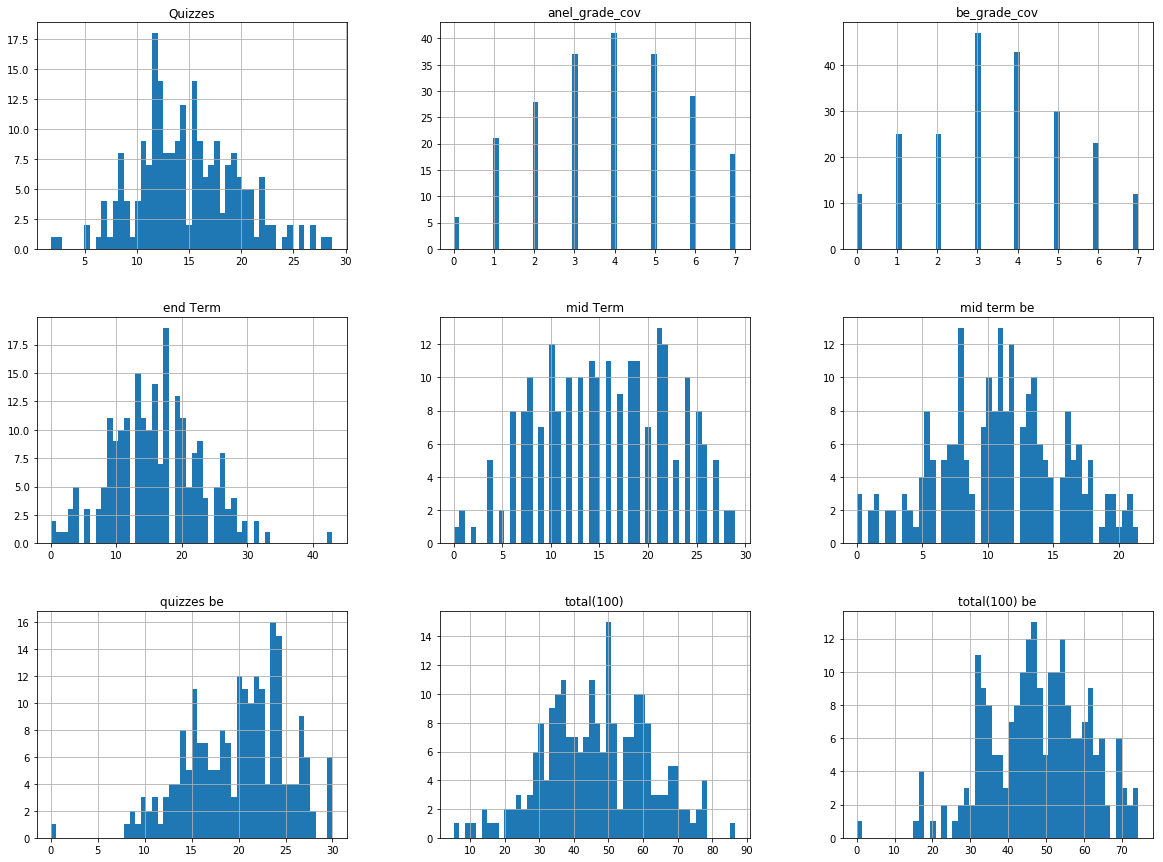

In [76]:
pair_plot_df.hist(bins=50, figsize=(20,15))
plt.show()

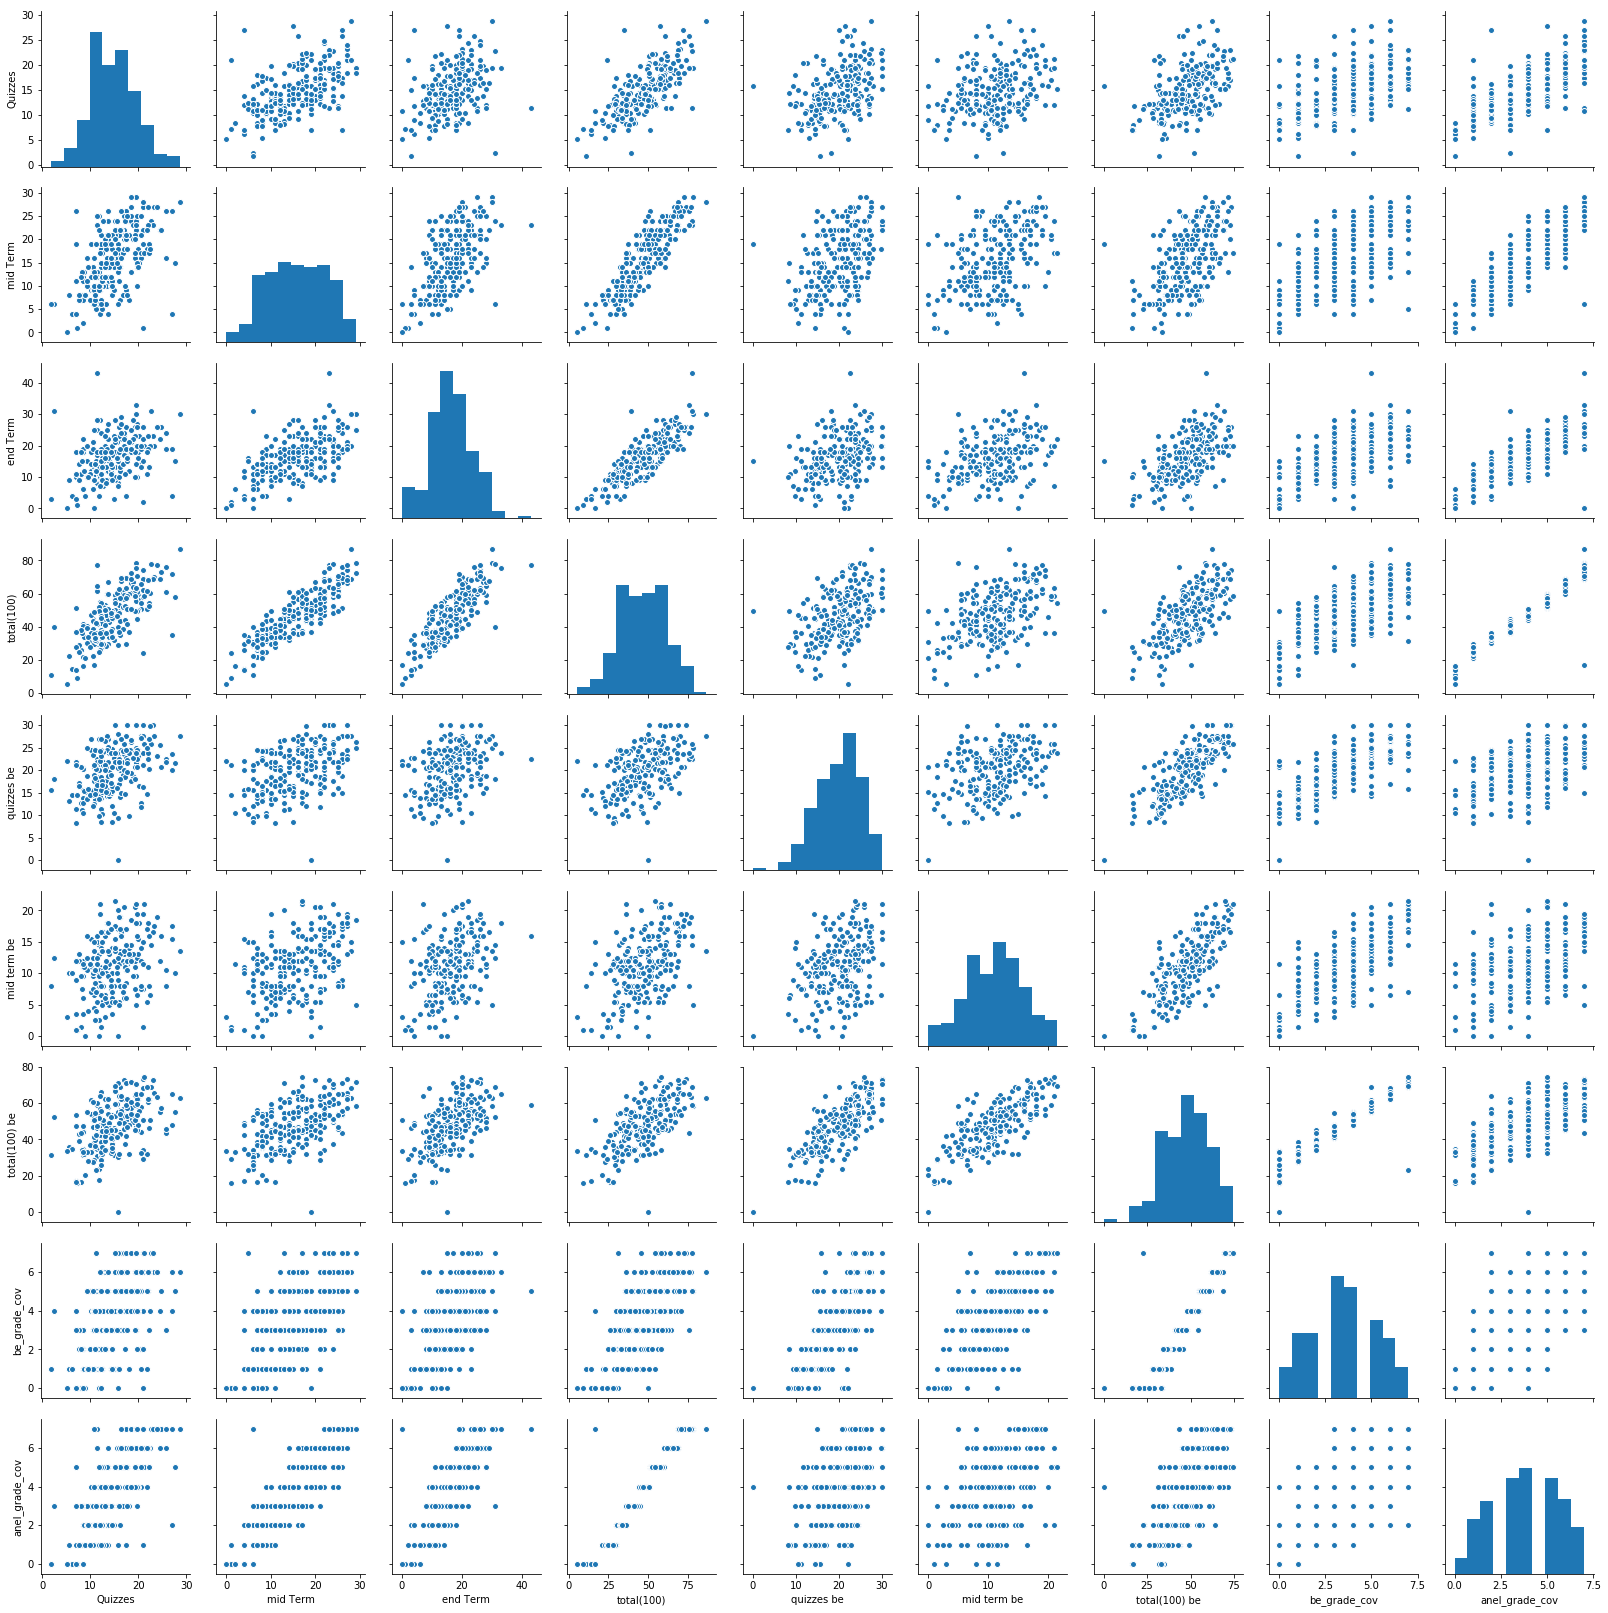

In [77]:
sns.pairplot(pair_plot_df)

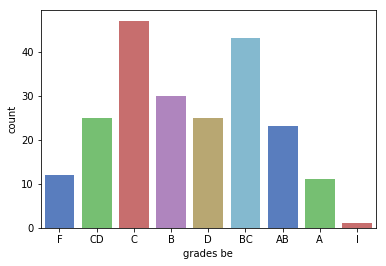

In [78]:
sns.countplot(x="grades be",data=final_df,palette='muted')
plt.show()

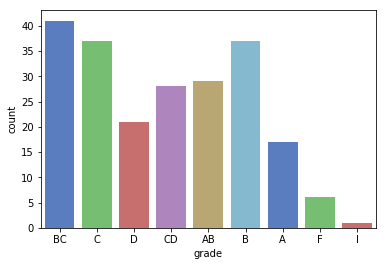

In [79]:
sns.countplot(x="grade",data=final_df,palette='muted')

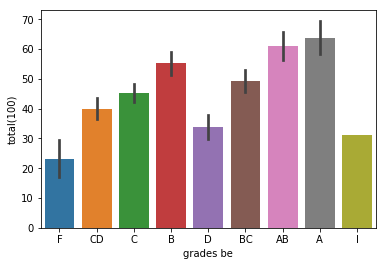

In [80]:
sns.barplot(x="grades be",y="total(100)",data=final_df)

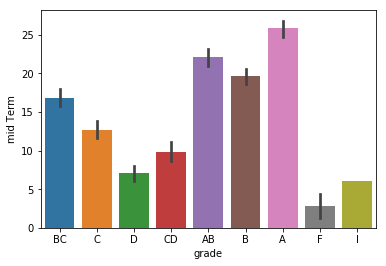

In [81]:
sns.barplot(x="grade",y="mid Term",data=final_df)

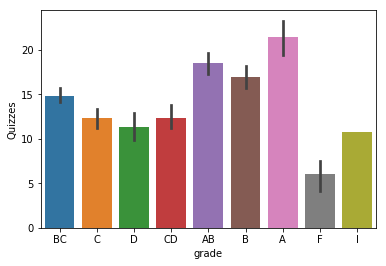

In [82]:
sns.barplot(x="grade",y="Quizzes",data=final_df)

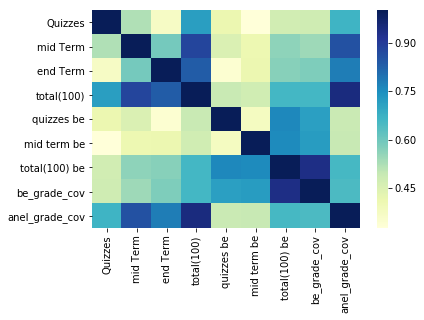

In [83]:
sns.heatmap(pair_plot_df.corr(),cmap="YlGnBu")

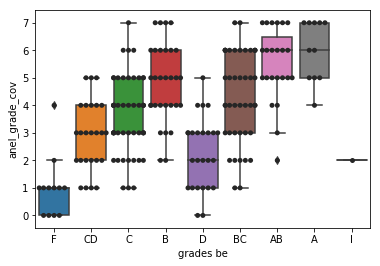

In [84]:
Plot=sns.boxplot(x="grades be",y="anel_grade_cov",data=final_df)
Plot=sns.swarmplot(x="grades be",y="anel_grade_cov",data=final_df,color=".15")
plt.show()